In [466]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import copy
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

In [2]:
with open('df_perfume.pkl','rb') as read_file:
    df_perfume = pickle.load(read_file)

In [3]:
df_perfume.shape

(1484, 4)

In [4]:
df_perfume_copy = copy.deepcopy(df_perfume)

In [5]:
df_perfume_copy = df_perfume_copy.drop_duplicates().reset_index()

In [6]:
df_perfume_copy.drop('index',axis=1,inplace=True)

In [7]:
df_perfume_copy.reset_index(drop=True, inplace=True)

In [ ]:
s = "Dewy daffodils, peony, and rose are blended with the essence of garden vines. This combination reveals a romantic floral that exudes elegance, grace, and luxury. Inspired by the works of 18th Century British artist Mrs. Mary Delany, Laura Slatkin collaborated with master perfumers to translate these works of art into luxurious fragrances that capture the essence of each of the botanicals that adorn the products' striking packaging. Notes: Dewy Daffodils, Peony, Rose, Garden Vines. Style: Elegant. Classic. Romantic."
d = "Nest"
frag_name_soph = "Dahlia & Vines"
p = 74.0
df_soph = pd.DataFrame([s, d, frag_name_soph, p])
df_soph = df_soph.T
df_soph.columns = ["description", "designer", "frag_name", "price"]
df_soph

In [522]:
df_perfume_copy = df_perfume_copy.append(df_soph, ignore_index=True)

In [523]:
df_perfume_copy

,description,designer,frag_name,price
0,Sporty. Invigorating. Refreshing. Men and wome...,Pour Le Monde,"EMPOWER 100% Certified Natural Eau de Parfum, ...",82
1,This fragrance evokes both the joyful feeling ...,CLEAN Fragrance,Endless Summer Limited Edition Eau de Toilette...,68
2,An intense new facet of the COCO MADEMOISELLE ...,CHANEL,"Eau de Parfum Intense Spray, 6.8-oz.",225
3,Gucci Bamboo emanates the Gucci woman's divers...,Gucci,"Bamboo Eau de Parfum Rollerball, 0.25 oz",34
4,Bad Boys are no good but good Boys are no fun....,Kilian,"Boys Eau de Parfum Spray, 1-oz.",75
5,"Oud, one of the world's most precious oils, is...",Ralph Lauren,"Oud Eau de Parfum Spray, 1.7-oz.",120
6,Created by Hubert de Givenchy as an homage to ...,Givenchy,"Organza Indecence Eau de Parfum Spray, 3.3 oz",100
7,The brightness of Italian bergamot and Provenc...,CLEAN Fragrance,"Classic Ultimate Fragrance Spray, 1-oz.",44
8,Dream. Dare. Laugh. Love. Experience the fragr...,Ralph Lauren,"RALPH by Ralph Lauren Eau de Toilette Spray, 1...",62
9,"For Valentine's Day, discover Prada Parfums' C...",Prada,Candy Eau de Parfum 3-Pc. Gift Set,124


In [524]:
df_perfume_copy['price'].notna().value_counts()

True    1451
Name: price, dtype: int64

In [525]:
na_price_mask = df_perfume_copy['price'].notna()

In [526]:
df_perfume_copy = df_perfume_copy[na_price_mask]

In [527]:
df_perfume_copy.reset_index(drop=True,inplace=True)

In [528]:
df_perfume_copy

,description,designer,frag_name,price
0,Sporty. Invigorating. Refreshing. Men and wome...,Pour Le Monde,"EMPOWER 100% Certified Natural Eau de Parfum, ...",82
1,This fragrance evokes both the joyful feeling ...,CLEAN Fragrance,Endless Summer Limited Edition Eau de Toilette...,68
2,An intense new facet of the COCO MADEMOISELLE ...,CHANEL,"Eau de Parfum Intense Spray, 6.8-oz.",225
3,Gucci Bamboo emanates the Gucci woman's divers...,Gucci,"Bamboo Eau de Parfum Rollerball, 0.25 oz",34
4,Bad Boys are no good but good Boys are no fun....,Kilian,"Boys Eau de Parfum Spray, 1-oz.",75
5,"Oud, one of the world's most precious oils, is...",Ralph Lauren,"Oud Eau de Parfum Spray, 1.7-oz.",120
6,Created by Hubert de Givenchy as an homage to ...,Givenchy,"Organza Indecence Eau de Parfum Spray, 3.3 oz",100
7,The brightness of Italian bergamot and Provenc...,CLEAN Fragrance,"Classic Ultimate Fragrance Spray, 1-oz.",44
8,Dream. Dare. Laugh. Love. Experience the fragr...,Ralph Lauren,"RALPH by Ralph Lauren Eau de Toilette Spray, 1...",62
9,"For Valentine's Day, discover Prada Parfums' C...",Prada,Candy Eau de Parfum 3-Pc. Gift Set,124


In [529]:
df_perfume_copy.description.iloc[88]

'Jimmy Choo Fever Eau de Parfum is an addictive and sensual fragrance. Experience the hypnotic scent with this gift set. GIFT SET INCLUDES: Eau de Parfum Spray, 3.3 fl. oz. Tote bag'

In [530]:
jjj = df_perfume_copy.groupby(['designer','frag_name'])

In [531]:
jjj.first()

description  \
designer   frag_name                                                                                     
ABBOTT     Big Sky Eau de Parfum, 1.7-oz.            A cool and crisp unisex fragrance (with a hint...   
           Sequoia Eau de Parfum, 1.7-oz.            A deep, woodsy and smoky unisex fragrance, ins...   
           Telluride Eau de Parfum, 1.7-oz.          A rich, leathery and peppery unisex fragrance ...   
           Voyageurs Eau de Parfum, 1.7-oz.          A fresh and green unisex fragrance, inspired b...   
Anna Sui   Romantica Eau de Toilette Spray, 1.7 oz.  Inspired by a mixture of Anna Sui's favorite f...   
...                                                                                                ...   
philosophy amazing grace spray fragrance, 2 oz.      Feminine. Beautiful. Clean. philosophy's best-...   
           amazing grace spray fragrance, 4 oz       Feminine. Beautiful. Clean. philosophy's best-...   
           pure grace all over body spritz, 8 oz.    Experience full-body scenting that begins with...   
           pure grace rollerball                     For women who want to smell soap and water cle...   
           pure grace spray fragrance, 2 oz          Pure. Crisp. Clean. pure grace represents clea...   

                                                     price  
designer   frag_name                                        
ABBOTT     Big Sky Eau de Parfum, 1.7-oz.             75.0  
           Sequoia Eau de Parfum, 1.7-oz.             75.0  
           Telluride Eau de Parfum, 1.7-oz.           75.0  
           Voyageurs Eau de Parfum, 1.7-oz.           75.0  
Anna Sui   Romantica Eau de Toilette Spray, 1.7 oz.   65.0  
...                                                    ...  
philosophy amazing grace spray fragrance, 2 oz.       50.0  
           amazing grace spray fragrance, 4 oz        72.0  
           pure grace all over body spritz, 8 oz.     30.0  
           pure grace rollerball                      21.0  
           pure grace spray fragrance, 2 oz           50.0  

[1396 rows x 2 columns]

In [532]:
df_nlp = df_perfume_copy.drop_duplicates(['description']).reset_index(drop=True)

In [533]:
df_nlp.description.sample(10)

805    Introduced in 1997. Organza Eau de Parfum is a...
548    Sweet, sensual and happy. Kenzo Amour Eau de P...
21     London's Covent Garden early morning market. S...
900    Introducing the first fragrance for her by Jas...
655    Passion fruit mingles with watermelon and tube...
720    Laura Mercier Eau de Lune® is a true modern cl...
972    Daisy Eau So Fresh transports you to a place t...
439    Sparkling. Charming. Exuberant. Celebrate with...
98     Sagittarius zodiac perfume inspires adventure ...
704    Bad Boys are no good but good Boys are no fun....
Name: description, dtype: object

In [534]:
test_string = df_nlp['description'].iloc[99]
test_string

'One of the world\'s leading lifestyle brands, Calvin Klein is synonymous with authentic modern minimalist style. Everything it creates —clothing, accessories, home design—becomes a timeless classic. The label\'s award-winning fragrances are no exception. Calvin Klein\'s portfolio of bold and iconic scents continues to redefine the world of perfume.  "Who hasn\'t felt passion beyond reason?" Obsession taps into a fantasy that speaks to every woman.  Obsession by Calvin Klein envelops the senses with intoxicating flowers and exotic spice.   Obsession revolutionized the world of fragrance with its intense, oriental accords. Addictive and long lasting, Obsession sets a sexy, provocative mood with a unique blend of heady, spicy, woody and floral notes on a sweet, seductive base of oriental vanilla and amber.   Created by Calvin Klein, the fragrance reflects the designer\'s own obsessions. Often referred to as "the 80s in a bottle" because it so perfectly captured the glamour and sexuality 

In [535]:
#cleaning functions

str_line_breaks = lambda x: x.replace('\n','')
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
dash_strip = lambda x: x.replace('—',' ')
double_space_strip = lambda x: re.sub(' +', ' ', x)

In [536]:
df_nlp['description'] = df_nlp['description']\
.map(str_line_breaks).map(alphanumeric).map(punc_lower).map(dash_strip).map(double_space_strip)
                     

In [537]:
df_nlp.description.iloc[99]

'one of the world s leading lifestyle brands calvin klein is synonymous with authentic modern minimalist style everything it creates clothing accessories home design becomes a timeless classic the label s award winning fragrances are no exception calvin klein s portfolio of bold and iconic scents continues to redefine the world of perfume who hasn t felt passion beyond reason obsession taps into a fantasy that speaks to every woman obsession by calvin klein envelops the senses with intoxicating flowers and exotic spice obsession revolutionized the world of fragrance with its intense oriental accords addictive and long lasting obsession sets a sexy provocative mood with a unique blend of heady spicy woody and floral notes on a sweet seductive base of oriental vanilla and amber created by calvin klein the fragrance reflects the designer s own obsessions often referred to as the in a bottle because it so perfectly captured the glamour and sexuality of the decade s excessive lifestyle obse

In [538]:
df_nlp['des_and_frag'] = df_nlp.designer+" - "+df_nlp.frag_name

In [539]:
df_nlp

,description,designer,frag_name,price,des_and_frag
0,sporty invigorating refreshing men and women c...,Pour Le Monde,"EMPOWER 100% Certified Natural Eau de Parfum, ...",82,Pour Le Monde - EMPOWER 100% Certified Natural...
1,this fragrance evokes both the joyful feeling ...,CLEAN Fragrance,Endless Summer Limited Edition Eau de Toilette...,68,CLEAN Fragrance - Endless Summer Limited Editi...
2,an intense new facet of the coco mademoiselle ...,CHANEL,"Eau de Parfum Intense Spray, 6.8-oz.",225,"CHANEL - Eau de Parfum Intense Spray, 6.8-oz."
3,gucci bamboo emanates the gucci woman s divers...,Gucci,"Bamboo Eau de Parfum Rollerball, 0.25 oz",34,"Gucci - Bamboo Eau de Parfum Rollerball, 0.25 oz"
4,bad boys are no good but good boys are no fun ...,Kilian,"Boys Eau de Parfum Spray, 1-oz.",75,"Kilian - Boys Eau de Parfum Spray, 1-oz."
5,oud one of the world s most precious oils is m...,Ralph Lauren,"Oud Eau de Parfum Spray, 1.7-oz.",120,"Ralph Lauren - Oud Eau de Parfum Spray, 1.7-oz."
6,created by hubert de givenchy as an homage to ...,Givenchy,"Organza Indecence Eau de Parfum Spray, 3.3 oz",100,Givenchy - Organza Indecence Eau de Parfum Spr...
7,the brightness of italian bergamot and provenc...,CLEAN Fragrance,"Classic Ultimate Fragrance Spray, 1-oz.",44,CLEAN Fragrance - Classic Ultimate Fragrance S...
8,dream dare laugh love experience the fragrance...,Ralph Lauren,"RALPH by Ralph Lauren Eau de Toilette Spray, 1...",62,Ralph Lauren - RALPH by Ralph Lauren Eau de To...
9,for valentine s day discover prada parfums can...,Prada,Candy Eau de Parfum 3-Pc. Gift Set,124,Prada - Candy Eau de Parfum 3-Pc. Gift Set


In [540]:
df_nlp[df_nlp['designer']=='CHANEL']

,description,designer,frag_name,price,des_and_frag
2,an intense new facet of the coco mademoiselle ...,CHANEL,"Eau de Parfum Intense Spray, 6.8-oz.",225,"CHANEL - Eau de Parfum Intense Spray, 6.8-oz."
25,before creating the house of chanel coco was g...,CHANEL,"Eau de Parfum Spray, 1.7-oz.",105,"CHANEL - Eau de Parfum Spray, 1.7-oz."
36,chance the country s bestselling fragrance fam...,CHANEL,"Eau de Toilette, 1.7-oz",85,"CHANEL - Eau de Toilette, 1.7-oz"
55,an elegant luxurious spray closest in strength...,CHANEL,"Eau de Parfum Spray, 3.4 oz",135,"CHANEL - Eau de Parfum Spray, 3.4 oz"
73,a foaming shower gel to start your fragrance r...,CHANEL,"GABRIELLE CHANEL Shower Gel, 6.8-oz.",55,"CHANEL - GABRIELLE CHANEL Shower Gel, 6.8-oz."
112,the now and forever fragrance the ultimate in ...,CHANEL,"Eau de Parfum Spray, 3.4 oz",135,"CHANEL - Eau de Parfum Spray, 3.4 oz"
132,sexy fresh oriental fragrance recalls the irre...,CHANEL,COCO MADEMOISELLE,107,CHANEL - COCO MADEMOISELLE
164,it s your chance take it a decidedly young sce...,CHANEL,"Parfum, .25 oz",130,"CHANEL - Parfum, .25 oz"
191,a new facet of chance is born the third genera...,CHANEL,"Eau de Toilette, 5-oz",135,"CHANEL - Eau de Toilette, 5-oz"
201,clean and sheer warm and sexy difficult to def...,CHANEL,"Eau de Toilette Spray, 3.4-oz",107,"CHANEL - Eau de Toilette Spray, 3.4-oz"


In [541]:
X = df_nlp.description
doc_label = df_nlp.des_and_frag

In [542]:
cv1 = CountVectorizer(stop_words='english')
X_cv1 = cv1.fit_transform(X)

In [543]:
cv1_df = pd.DataFrame(X_cv1.toarray(), columns=cv1.get_feature_names(),index=doc_label)

In [544]:
cv1_df.shape

(1133, 5378)

In [545]:
cv1_df.abandon.sum()

3

In [546]:
cv1_df

,abandon,abbott,ability,absence,absinthe,absolu,absolus,absolute,absolutely,absolutes,...,zests,zesty,zodiac,écarlate,éclat,élixir,élysées,época,ïto,ôud
des_and_frag,,,,,,,,,,,,,,,,,,,,,
"Pour Le Monde - EMPOWER 100% Certified Natural Eau de Parfum, 1.7 oz",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"CLEAN Fragrance - Endless Summer Limited Edition Eau de Toilette, 2-oz.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"CHANEL - Eau de Parfum Intense Spray, 6.8-oz.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Gucci - Bamboo Eau de Parfum Rollerball, 0.25 oz",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Kilian - Boys Eau de Parfum Spray, 1-oz.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Ralph Lauren - Oud Eau de Parfum Spray, 1.7-oz.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Givenchy - Organza Indecence Eau de Parfum Spray, 3.3 oz",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"CLEAN Fragrance - Classic Ultimate Fragrance Spray, 1-oz.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Ralph Lauren - RALPH by Ralph Lauren Eau de Toilette Spray, 1.7 oz.",0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [547]:
cv1_df.zesty.sum()

11

next steps notes: 

cos similarity (wookie problem) to compare a doc to others based on lower space

In [548]:
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

In [549]:
nmf_model = NMF(20)
doc_topic = nmf_model.fit_transform(cv1_df)

In [550]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [551]:
display_topics(nmf_model, cv1.get_feature_names(), 10)


Topic  0
notes, middle, base, jasmine, orange, musk, sandalwood, mandarin, amber, vanilla

Topic  1
oz, set, gift, includes, spray, body, lotion, fl, eau, purse

Topic  2
note, middle, orange, blossom, fresh, scent, green, create, lemon, base

Topic  3
fragrance, floral, new, woman, feminine, world, sensual, modern, experience, flower

Topic  4
la, vie, belle, est, es, iris, life, notes, una, patchouli

Topic  5
rose, heart, absolute, essence, sandalwood, chloé, notes, patchouli, coffee, romance

Topic  6
ml, love, collection, notes, key, kilian, wanted, bottle, pedestal, fun

Topic  7
wood, oud, rare, exotic, rich, sensuality, cardamom, blend, tonka, bean

Topic  8
parfum, eau, spray, sensual, twist, signature, chloé, ml, tiffany, flowerbomb

Topic  9
body, scent, skin, spray, wear, free, mist, cashmere, perfect, like

Topic  10
gucci, bloom, floral, scent, new, di, jasmine, tuberose, fiori, guilty

Topic  11
pink, patchouli, vanilla, heart, sweet, pepper, like, amber, sophisticated,

### Yuck... need to do way more cleaning and try TFIDF

In [552]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [553]:
tfidf1 = TfidfVectorizer(stop_words='english',min_df=2,max_df=50)

In [554]:
X_tfidf1 = tfidf1.fit_transform(X)

In [555]:
X_tfidf1.shape

(1133, 3304)

In [556]:
doc_topic_tfidf = nmf_model.fit_transform(X_tfidf1)

In [557]:
H = pd.DataFrame(doc_topic_tfidf.round(5),
             index = doc_label)
H

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
des_and_frag,,,,,,,,,,,,,,,,,,,,
"Pour Le Monde - EMPOWER 100% Certified Natural Eau de Parfum, 1.7 oz",0.00691,0.01764,0.00354,0.00792,0.00000,0.00000,0.00115,0.00194,0.00318,0.00000,0.00000,0.00000,0.00000,0.01049,0.01187,0.02215,0.01666,0.00000,0.00390,0.00280
"CLEAN Fragrance - Endless Summer Limited Edition Eau de Toilette, 2-oz.",0.01703,0.00000,0.00032,0.00000,0.00000,0.00000,0.00000,0.00000,0.03182,0.06062,0.00974,0.00159,0.00000,0.00748,0.02570,0.01551,0.01833,0.07369,0.00000,0.00000
"CHANEL - Eau de Parfum Intense Spray, 6.8-oz.",0.00130,0.00304,0.00429,0.00000,0.00000,0.00787,0.01594,0.00000,0.00321,0.00265,0.01068,0.03202,0.00072,0.00000,0.00000,0.03761,0.00465,0.00141,0.00000,0.06773
"Gucci - Bamboo Eau de Parfum Rollerball, 0.25 oz",0.00000,0.00000,0.22284,0.00000,0.00000,0.00000,0.00000,0.00066,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.02863,0.00000,0.00000,0.00552,0.01882
"Kilian - Boys Eau de Parfum Spray, 1-oz.",0.00000,0.00000,0.00000,0.45373,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00687,0.00000,0.00000
"Ralph Lauren - Oud Eau de Parfum Spray, 1.7-oz.",0.00000,0.00000,0.00000,0.00000,0.00000,0.13109,0.00000,0.00000,0.01700,0.00212,0.00000,0.00000,0.24316,0.00000,0.00000,0.01952,0.00000,0.00000,0.00000,0.00000
"Givenchy - Organza Indecence Eau de Parfum Spray, 3.3 oz",0.01069,0.00000,0.00000,0.02171,0.00000,0.00084,0.00000,0.00000,0.00000,0.02372,0.00000,0.01209,0.00000,0.00000,0.00000,0.02050,0.00823,0.05614,0.00856,0.00000
"CLEAN Fragrance - Classic Ultimate Fragrance Spray, 1-oz.",0.02286,0.00077,0.00000,0.02612,0.00000,0.00014,0.00669,0.00006,0.00000,0.00668,0.00847,0.00000,0.00000,0.01137,0.00000,0.00000,0.00986,0.00000,0.00000,0.00337
"Ralph Lauren - RALPH by Ralph Lauren Eau de Toilette Spray, 1.7 oz.",0.00000,0.00033,0.00000,0.01927,0.00000,0.00000,0.00000,0.00000,0.00000,0.00224,0.00055,0.00000,0.00089,0.00000,0.00000,0.27313,0.00000,0.00000,0.00000,0.00000


In [558]:
pass

In [559]:
display_topics(nmf_model, tfidf1.get_feature_names(), 10)


Topic  0
coach, leather, lauder, roses, estée, blossoms, pleasures, tea, suede, click

Topic  1
london, malone, jo, nestled, finesse, diffuse, help, generously, spritz, heat

Topic  2
gucci, guilty, bloom, lilac, edge, creeper, rangoon, première, fiori, authentic

Topic  3
ml, kilian, wanted, pedestal, lovers, instantly, recognizable, fun, dare, expect

Topic  4
la, viva, couture, girl, vie, belle, est, honeysuckle, rosé, caramel

Topic  5
oud, rare, cardamom, arsenal, expensive, smoky, incense, dark, exposes, add

Topic  6
cashmere, mist, moroccan, valley, essences, sheer, luxury, background, combining, concentration

Topic  7
guerlain, mon, lavender, tribute, angelina, jolie, strong, quadrilobe, adorment, attributed

Topic  8
transportive, substantive, foliage, crisp, splashy, breezes, lush, clear, undertones, cool

Topic  9
daisy, jacobs, marc, sunny, place, pen, girls, plum, transports, finish

Topic  10
chloé, chic, paris, founded, chloe, ago, years, principles, freedom, lightnes

In [560]:
H.shape

(1133, 20)

In [561]:
z = H.loc['Pour Le Monde - EMPOWER 100% Certified Natural Eau de Parfum, 1.7 oz']

In [562]:
np.array(z).reshape(1,20)

array([[0.00691, 0.01764, 0.00354, 0.00792, 0.     , 0.     , 0.00115,
        0.00194, 0.00318, 0.     , 0.     , 0.     , 0.     , 0.01049,
        0.01187, 0.02215, 0.01666, 0.     , 0.0039 , 0.0028 ]])

In [563]:
myrow=H.iloc[268].to_numpy().reshape(1,-1)

In [564]:
j =cosine_similarity(myrow, H)

In [565]:
most_sim_to_zero = np.argsort(-j)

In [566]:
most_sim_to_zero[0][0:5]

array([ 268,  552,  330,  354, 1106])

In [567]:
H.iloc[754]

0     0.00569
1     0.00000
2     0.00000
3     0.00000
4     0.00000
5     0.00000
6     0.00690
7     0.00000
8     0.00000
9     0.00263
10    0.05329
11    0.00000
12    0.00000
13    0.00576
14    0.00000
15    0.00898
16    0.00028
17    0.00006
18    0.00000
19    0.05922
Name: Tom Ford - White Patchouli Eau de Parfum Spray, 1.7 oz, dtype: float64

In [568]:
H.iloc[278]

0     0.00278
1     0.00000
2     0.01369
3     0.00395
4     0.00000
5     0.00000
6     0.00000
7     0.00000
8     0.00000
9     0.00000
10    0.00890
11    0.00000
12    0.00000
13    0.00223
14    0.04332
15    0.05609
16    0.03707
17    0.00000
18    0.00287
19    0.07779
Name: Lacoste - Pour Femme Eau de Parfum, 3 oz, dtype: float64

In [569]:
df_nlp.head()

,description,designer,frag_name,price,des_and_frag
0,sporty invigorating refreshing men and women c...,Pour Le Monde,"EMPOWER 100% Certified Natural Eau de Parfum, ...",82,Pour Le Monde - EMPOWER 100% Certified Natural...
1,this fragrance evokes both the joyful feeling ...,CLEAN Fragrance,Endless Summer Limited Edition Eau de Toilette...,68,CLEAN Fragrance - Endless Summer Limited Editi...
2,an intense new facet of the coco mademoiselle ...,CHANEL,"Eau de Parfum Intense Spray, 6.8-oz.",225,"CHANEL - Eau de Parfum Intense Spray, 6.8-oz."
3,gucci bamboo emanates the gucci woman s divers...,Gucci,"Bamboo Eau de Parfum Rollerball, 0.25 oz",34,"Gucci - Bamboo Eau de Parfum Rollerball, 0.25 oz"
4,bad boys are no good but good boys are no fun ...,Kilian,"Boys Eau de Parfum Spray, 1-oz.",75,"Kilian - Boys Eau de Parfum Spray, 1-oz."


In [570]:
df_nlp.des_and_frag

0       Pour Le Monde - EMPOWER 100% Certified Natural...
1       CLEAN Fragrance - Endless Summer Limited Editi...
2           CHANEL - Eau de Parfum Intense Spray, 6.8-oz.
3        Gucci - Bamboo Eau de Parfum Rollerball, 0.25 oz
4                Kilian - Boys Eau de Parfum Spray, 1-oz.
                              ...                        
1128    Narciso Rodriguez - 3-Pc. Fleur Musc Eau de To...
1129                      HERMÈS - Eau de Parfum, 3.3-oz.
1130    Mugler - ANGEL Muse Eau de Parfum Refillable S...
1131         Estée Lauder - pleasures Body Lotion, 8.4 oz
1132                                Nest - Dahlia & Vines
Name: des_and_frag, Length: 1133, dtype: object

In [571]:
des_and_frag_ls = []
for row in df_nlp.designer:
    des_and_frag_ls.append(row.lower().split())

In [572]:
des_and_frag_ls[:5]

[['pour', 'le', 'monde'],
 ['clean', 'fragrance'],
 ['chanel'],
 ['gucci'],
 ['kilian']]

In [573]:
des_and_frag_flat_list = []
for sublist in des_and_frag_ls:
    for item in sublist:
        des_and_frag_flat_list.append(item)

In [574]:
len(des_and_frag_flat_list)

1901

In [575]:
#cast to set to get rid of dups
des_and_frag_flat_list = set(des_and_frag_flat_list)
des_and_frag_flat_list = list(des_and_frag_flat_list)
len(des_and_frag_flat_list)

163

In [576]:
#This is my stopword list for designer names/frags
des_and_frag_flat_list[:20]

['lepore',
 'provision',
 'armani',
 'vince',
 'jacobs',
 'marc',
 'kilian',
 'giorgio',
 'hilfiger',
 'nanette',
 'lauren',
 'viktor',
 'oscar',
 '1942',
 'hilton',
 'mac',
 'scents',
 'taylor',
 'will',
 'veneta']

In [577]:
#modify the stopwords to make sure I dont purge words that seem useful
#innocent flower opal basil beach sun cherry
des_and_frag_flat_list.remove('clean')
len(des_and_frag_flat_list)

162

In [578]:
to_add = ['eau','ml', 'oz','jo','oud']
for word in to_add:
    des_and_frag_flat_list.append(word)

In [579]:
len(des_and_frag_flat_list)

167

In [580]:
from sklearn.feature_extraction import text 
stop_words=[]
stop_words = text.ENGLISH_STOP_WORDS.union(des_and_frag_flat_list)
stop_words

frozenset({'&',
           '1942',
           'a',
           'abbott',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'aniston',
           'anna',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'arden',
           'are',
           'armani',
           'around',
           'as',
           'at',
           'azzaro',
           'back',
           'balenciaga',
           'be',
           'became',
           'because',
           'become',
           'becomes',
      

In [581]:
len(stop_words)

480

### 2nd go at TFIDF

In [582]:
tfidf2 = TfidfVectorizer(stop_words=stop_words,min_df=2,max_df=50,strip_accents='unicode')

In [583]:
X_tfidf2 = tfidf2.fit_transform(X)

/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arc', 'estee', 'hermes', 'lancome', 'macy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [584]:
X_tfidf2.shape

(1133, 3197)

In [585]:
nmf_model2 = NMF(35)

In [586]:
doc_topic_tfidf2 = nmf_model2.fit_transform(X_tfidf2)

In [587]:
H2 = pd.DataFrame(doc_topic_tfidf2.round(5),
             index = doc_label)
H2

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
des_and_frag,,,,,,,,,,,,,,,,,,,,,
"Pour Le Monde - EMPOWER 100% Certified Natural Eau de Parfum, 1.7 oz",0.00167,0.02144,0.00879,0.00000,0.00068,0.00000,0.00066,0.00337,0.00595,0.00056,...,0.00000,0.00000,0.02611,0.00859,0.00000,0.00000,0.00273,0.01327,0.00245,0.00228
"CLEAN Fragrance - Endless Summer Limited Edition Eau de Toilette, 2-oz.",0.00000,0.00013,0.00000,0.00000,0.00000,0.06743,0.00228,0.02874,0.00828,0.00000,...,0.00494,0.00000,0.00000,0.01078,0.00850,0.02301,0.00000,0.00000,0.00000,0.00000
"CHANEL - Eau de Parfum Intense Spray, 6.8-oz.",0.00000,0.00160,0.00000,0.00000,0.00632,0.00000,0.00493,0.00000,0.04323,0.00000,...,0.00000,0.00000,0.02378,0.00000,0.00000,0.00000,0.00064,0.01838,0.00000,0.00000
"Gucci - Bamboo Eau de Parfum Rollerball, 0.25 oz",0.00000,0.00062,0.00083,0.00000,0.00000,0.00241,0.01318,0.00000,0.06390,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.03016,0.00000,0.00000,0.00329
"Kilian - Boys Eau de Parfum Spray, 1-oz.",0.00000,0.00000,0.43355,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"Ralph Lauren - Oud Eau de Parfum Spray, 1.7-oz.",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.01420,0.01677,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.34056,0.00000,0.00000,0.00000
"Givenchy - Organza Indecence Eau de Parfum Spray, 3.3 oz",0.00000,0.00000,0.02485,0.00000,0.00000,0.02684,0.00000,0.00000,0.02990,0.00038,...,0.00000,0.00799,0.00373,0.00000,0.00000,0.05328,0.00000,0.05229,0.00417,0.00000
"CLEAN Fragrance - Classic Ultimate Fragrance Spray, 1-oz.",0.00077,0.00089,0.02543,0.00000,0.00435,0.00617,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.03623,0.00000,0.00000,0.00000,0.00000,0.00000,0.02341,0.00382,0.01107
"Ralph Lauren - RALPH by Ralph Lauren Eau de Toilette Spray, 1.7 oz.",0.00000,0.00000,0.00188,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.52433,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [588]:
display_topics(nmf_model2, tfidf2.get_feature_names(), 20)


Topic  0
amalfi, di, night, blooming, mandarino, fruits, air, cliffsides, mint, idyll, scented, villas, dotting, whitewashed, calm, private, breeze, wildflowers, effect, waft

Topic  1
diffuse, nestled, finesse, help, generously, heat, goes, spritz, wrists, basil, blackberry, clementine, bay, amberwood, twist, mingling, damask, moss, rosemary, orriswood

Topic  2
wanted, pedestal, lovers, recognizable, fun, instantly, exhibition, hennessy, sex, expect, grab, grabbing, phrase, lipstick, glossy, welcome, game, instant, graphic, dare

Topic  3
viva, honeysuckle, berries, caramel, girl, party, gardenia, dreamy, fizzy, pops, cheers, toast, glamorous, celebrate, noir, glow, kissed, perfection, rendition, forever

Topic  4
cashmere, mist, moroccan, valley, essences, background, sheer, luxury, combining, concentration, indulgence, subtler, bare, year, lighter, whisper, cleansing, long, veil, sensually

Topic  5
daisy, sunny, place, girls, plum, pen, transports, alberto, morillas, finish, char

In [589]:
H2.head(20)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
des_and_frag,,,,,,,,,,,,,,,,,,,,,
"Pour Le Monde - EMPOWER 100% Certified Natural Eau de Parfum, 1.7 oz",0.00167,0.02144,0.00879,0.00000,0.00068,0.00000,0.00066,0.00337,0.00595,0.00056,...,0.00000,0.00000,0.02611,0.00859,0.00000,0.00000,0.00273,0.01327,0.00245,0.00228
"CLEAN Fragrance - Endless Summer Limited Edition Eau de Toilette, 2-oz.",0.00000,0.00013,0.00000,0.00000,0.00000,0.06743,0.00228,0.02874,0.00828,0.00000,...,0.00494,0.00000,0.00000,0.01078,0.00850,0.02301,0.00000,0.00000,0.00000,0.00000
"CHANEL - Eau de Parfum Intense Spray, 6.8-oz.",0.00000,0.00160,0.00000,0.00000,0.00632,0.00000,0.00493,0.00000,0.04323,0.00000,...,0.00000,0.00000,0.02378,0.00000,0.00000,0.00000,0.00064,0.01838,0.00000,0.00000
"Gucci - Bamboo Eau de Parfum Rollerball, 0.25 oz",0.00000,0.00062,0.00083,0.00000,0.00000,0.00241,0.01318,0.00000,0.06390,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.03016,0.00000,0.00000,0.00329
"Kilian - Boys Eau de Parfum Spray, 1-oz.",0.00000,0.00000,0.43355,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
"Ralph Lauren - Oud Eau de Parfum Spray, 1.7-oz.",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.01420,0.01677,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.34056,0.00000,0.00000,0.00000
"Givenchy - Organza Indecence Eau de Parfum Spray, 3.3 oz",0.00000,0.00000,0.02485,0.00000,0.00000,0.02684,0.00000,0.00000,0.02990,0.00038,...,0.00000,0.00799,0.00373,0.00000,0.00000,0.05328,0.00000,0.05229,0.00417,0.00000
"CLEAN Fragrance - Classic Ultimate Fragrance Spray, 1-oz.",0.00077,0.00089,0.02543,0.00000,0.00435,0.00617,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.03623,0.00000,0.00000,0.00000,0.00000,0.00000,0.02341,0.00382,0.01107
"Ralph Lauren - RALPH by Ralph Lauren Eau de Toilette Spray, 1.7 oz.",0.00000,0.00000,0.00188,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.52433,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [590]:
z = H2.loc['Kilian - Boys Eau de Parfum Spray, 1-oz.']

In [591]:
z = 'Juicy Couture - Viva la Juicy Eau de Parfum, 3.4 oz'

In [592]:
d = "Marc Jacobs - Daisy Eau So Fresh MARC JACOBS Eau de Toilette Spray, 4.2 oz."

In [593]:
np.array(z).reshape(1,-1)

array([['Juicy Couture - Viva la Juicy Eau de Parfum, 3.4 oz']],
      dtype='<U51')

In [594]:
myrow=H2.loc[z].to_numpy().reshape(1,-1)

In [595]:
j =cosine_similarity(myrow, H2)

In [596]:
most_sim_to_zero = np.argsort(-j)

In [597]:
most_sim_to_zero[0][0:30]

array([ 549,  313,  446,  528,  295,  100, 1077,  270,  484, 1019,   94,
        902,  537,  693,  994,  585,  865,  439,  851,  816,  818,  251,
        448,  960,  204,  805,   52,  290,  246, 1041])

In [598]:
most_sim_to_zero[0][1]

313

In [599]:
H2.iloc[549][34]

0.0

In [600]:
H2.iloc[960]

0     0.00000
1     0.00165
2     0.00000
3     0.01211
4     0.00000
5     0.00000
6     0.00000
7     0.00000
8     0.00000
9     0.00000
10    0.00000
11    0.00000
12    0.00000
13    0.00000
14    0.00000
15    0.00016
16    0.01050
17    0.00000
18    0.00000
19    0.00000
20    0.00007
21    0.00223
22    0.00000
23    0.00044
24    0.00000
25    0.00000
26    0.00186
27    0.00044
28    0.00000
29    0.00000
30    0.00017
31    0.01006
32    0.00000
33    0.00000
34    0.00000
Name: Carolina Herrera - CH by Carolina Herrera Eau de Toilette Spray, 1.7 oz., dtype: float64

In [613]:
df_nlp.iloc[1132].description

'dewy daffodils peony and rose are blended with the essence of garden vines this combination reveals a romantic floral that exudes elegance grace and luxury inspired by the works of century british artist mrs mary delany laura slatkin collaborated with master perfumers to translate these works of art into luxurious fragrances that capture the essence of each of the botanicals that adorn the products striking packaging notes dewy daffodils peony rose garden vines style elegant classic romantic '

In [610]:
df_nlp[df_nlp['designer']=='Nest']

,description,designer,frag_name,price,des_and_frag
1132,dewy daffodils peony and rose are blended with...,Nest,Dahlia & Vines,74,Nest - Dahlia & Vines


In [602]:
def perfume_reco():
    """
    This function asks the user to enter a fragrance and will return the top 3 similar fragrances
    of different designers.
    
    Note: You have to enter in the exact name of the fragance as is illustrated in the des_and_frag
    column of the the df_nlp dataframe.
    """
    
    user_frag = input("Please enter your current fragrance: ")  #User impute. Note: 
    
    doc_term_row = H2.loc[user_frag].to_numpy().reshape(1,-1)           ######################
    most_sim_to_user = np.argsort(-cosine_similarity(doc_term_row, H2)) #Get cosin similarity#
    all_perf_recos = list(H2.iloc[most_sim_to_user[0][1:300]].index)    ######################
    
    three_recos_ls = []         #Initialize the 3 perfume recommendation list
    
    for perf in all_perf_recos:   #Loop through the cosign similarity list
        if perf[:3]!=user_frag[:3]:   #Only want different designer fragrances
            if len(three_recos_ls) == 0:  #Put the first non-similar designer perf in recomendation list
                three_recos_ls.append(perf)
            elif perf[:3] != three_recos_ls[-1][:3]:   #I want 3 different designers, so the reco list shouldnt be all the same designers.
                three_recos_ls.append(perf)
                
        
        if len(three_recos_ls) >= 3:   #once the list has 3 perfumes, stop the recommendations.
            break
    
    return three_recos_ls
            
    

In [663]:
perfume_reco()

Please enter your current fragrance: Chloe - Chloé Eau de Parfum, 2.5 oz


["Cacharel - Anais Anais L'Original Eau de Toilette Spray for Her, 3.4 oz",
 'CHANEL - Eau de Toilette Spray, 3.4-oz',
 'Michael Kors - 4-Pc. Sexy Amber Gift Set']

In [436]:
def perfume_reco_full():
    """
    This function asks the user to enter a fragrance and will return the top 25 similar fragrances.
    """
    user_frag = input("Please enter your current fragrance: ")
    doc_term_row = H2.loc[user_frag].to_numpy().reshape(1,-1)
    most_sim_to_user = np.argsort(-cosine_similarity(doc_term_row, H2))
    return list(H2.iloc[most_sim_to_user[0][1:25]].index)


In [659]:
perfume_reco_full()

Please enter your current fragrance: Viktor & Rolf - Flowerbomb Eau de Parfum Spray, 3.4 oz.


['Viktor & Rolf - Flowerbomb Eau de Parfum Spray, 1 oz.',
 'Viktor & Rolf - Flowerbomb Bomblicious Perfumed Hair Mist, 1.0 fl oz',
 'Viktor & Rolf - Flowerbomb Bomblicious Perfumed Shower Gel, 6.7 fl oz',
 "Michel Germain - 3-Pc. sexual noir Gift Set, Created for Macy's!",
 "Michel Germain - Lady's Sexual Paris Tendre Eau de Parfum Spray, 2.5 oz.",
 "Michel Germain - sexual noir Eau de Parfum, 4.2 oz - A Macy's Exclusive",
 "Michel Germain - sexual noir Eau de Parfum, 2.5 oz - A Macy's Exclusive",
 'Michel Germain - 2-Pc. Sexual Noir Gift Set,  A $ 127 Value',
 'Viktor & Rolf - Flowerbomb Nectar Eau de Parfum Spray, 1.7-oz.',
 'Viktor & Rolf - Flowerbomb Soap, 3.5 oz',
 'Tom Ford - Velvet Orchid Eau de Parfum Spray, 3.4 oz',
 'Viktor & Rolf - Flowerbomb Eau de Parfum Spray, 5-oz.',
 'Tom Ford - Velvet Orchid Hydrating Emulsion, 5 oz',
 'Jimmy Choo - Eau de Parfum Spray, 2 oz.',
 'Jimmy Choo - Eau de Parfum Spray, 3.3 oz.',
 'Jimmy Choo - Eau de Parfum Rollerball, 0.33 oz.',
 'Tom Ford 

In [614]:
type(doc_topic_tfidf2)

numpy.ndarray

In [485]:
tsne_model = TSNE(metric='cosine',n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_nmf = tsne_model.fit_transform(doc_topic_tfidf2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1132 samples in 0.000s...
[t-SNE] Computed neighbors for 1132 samples in 0.039s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1132
[t-SNE] Computed conditional probabilities for sample 1132 / 1132
[t-SNE] Mean sigma: 0.289959
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.293297
[t-SNE] KL divergence after 1000 iterations: 0.669175


In [490]:
new_df_nlp = df_nlp.copy()

In [491]:
new_df_nlp["tsne_x"] = tsne_nmf[:,0]
new_df_nlp["tsne_y"] = tsne_nmf[:,1]


In [622]:
%pylab inline

figsize(7,7)

Populating the interactive namespace from numpy and matplotlib


In [650]:
plot_df = new_df_nlp[new_df_nlp.designer.isin(["CHANEL", "Tom Ford", "Gucci", "Dolce & Gabbana"]) ]

(array([-30., -20., -10.,   0.,  10.,  20.,  30.,  40.]),
 <a list of 8 Text yticklabel objects>)

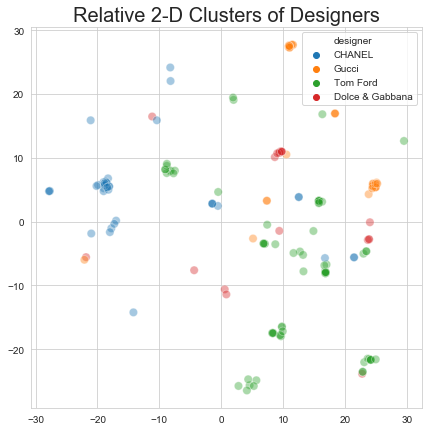

In [658]:
sns.scatterplot(x="tsne_x", y="tsne_y", hue="designer", marker="o", alpha=.4, data=plot_df, s=70)
plt.title('Relative 2-D Clusters of Designers', fontdict={"fontsize":20})
plt.xlabel("")
plt.ylabel("")
plt.xticks()
plt.yticks()
plt.legend()